# TRANSCOM

In [23]:
import numpy as np
import pandas as pd
import gzip
from netCDF4 import Dataset,num2date
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import os
import matplotlib as mplt
import cartopy.crs as ccrs
import cartopy.feature as cfea
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
warnings.filterwarnings("ignore")

In [18]:
path='./DATA/'
file=path+'regions_TRANSCOM_land_modified.nc'

In [19]:
nc = Dataset(file,'r')
lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]
kopi= (nc.variables['mask_region'][:,:])

In [22]:
list_coef=[0.847538,0.764667,0.822202,0.853577,0.860061,0.870323,0.984925,0.635517,
           0.98235,0.913583,0.980098,0.695111,0.8586,0.989582]
list_coef=[1-i for i in list_coef]

col_dict = {
    0:"none",
    1:(0,0,0,list_coef[0]),
    2:(0,0,0,list_coef[1]),
    3:(0,0,0,list_coef[2]),
    4:(0,0,0,list_coef[3]),
    5:(0,0,0,list_coef[4]),
    6:(0,0,0,list_coef[5]),
    9:(0,0,0,list_coef[6]),
    10:(0,0,0,list_coef[7]),
    46:(0,0,0,list_coef[8]),
    47:(0,0,0,list_coef[9]),
    48:(0,0,0,list_coef[10]),
    49:(0,0,0,list_coef[11]),
    49:(0,0,0,list_coef[12]),
    49:(0,0,0,list_coef[13])
}

cm = ListedColormap([col_dict[x] for x in col_dict.keys()])
kopi[np.isnan(kopi)] = 0
newkopi = kopi[0,:,:].data

for i in range(1,len(levels)):
     newkopi = (kopi[i,:,:].data*(i+1)) + newkopi
        
newkopi[newkopi > 13] = 0.0

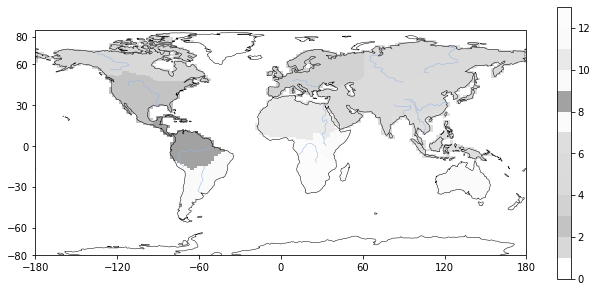

In [21]:
projection=ccrs.PlateCarree()
bbox=[-180,180,-60,85];creg='glob'

fig=plt.figure(figsize=(11,5))
ax=fig.add_subplot(1,1,1,projection=projection)

ax.set_extent(bbox,projection)
ax.add_feature(cfea.COASTLINE,lw=.5)
ax.add_feature(cfea.RIVERS,lw=.5)

levels=[0,1,2,3,4,5,6,9,10,46,47,48,49]

cmap=plt.cm.BrBG
norm=mplt.colors.BoundaryNorm(levels,cmap.N)

sm = plt.pcolormesh(lon,lat,newkopi,transform=projection,cmap=cm)

sm = plt.colorbar(sm,ax=ax)

ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-80, -60, -30,0, 30, 60, 80], crs=ccrs.PlateCarree())